# Round 1

In [18]:
import pandas as pd
import numpy as np

In [19]:
import dabl

In [63]:
cols = ['Winner', 'title_bout', 'weight_class', 'gender',
        'better_rank', 'lose_streak_dif', 'win_streak_dif',
       'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif',
       'total_title_bout_dif', 'ko_dif', 'sub_dif', 'height_dif', 'reach_dif',
       'age_dif', 'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'B_fighter',
       'B_odds', 'R_fighter', 'R_odds']

In [64]:
ufc = pd.read_csv('../data/tf_data/ufc-master.csv')

In [65]:
ufc = ufc[cols]

In [66]:
ufc.head()

,Winner,title_bout,weight_class,gender,better_rank,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_fighter,B_odds,R_fighter,R_odds
0,Blue,True,Heavyweight,MALE,Red,0,2,0,-10,-5,...,2.54,5.08,-5,2.88,0.3,0.22,Ciryl Gane,-320,Derrick Lewis,250
1,Red,False,Bantamweight,MALE,Red,0,0,-11,-10,-1,...,-2.54,-12.70,0,1.92,0.6,0.07,Pedro Munhoz,-115,Jose Aldo,-105
2,Blue,False,Welterweight,MALE,Red,0,-1,2,2,-1,...,-5.08,0.00,-4,3.78,-0.1,-2.98,Vicente Luque,-105,Michael Chiesa,-115
3,Red,False,Women's Strawweight,FEMALE,Red,0,-1,0,0,4,...,5.08,10.16,5,1.00,0.0,-0.17,Angela Hill,140,Tecia Torres,-160
4,Red,False,Bantamweight,MALE,neither,0,0,-1,1,2,...,-2.54,2.54,7,-0.06,0.1,0.60,Casey Kenney,-125,Song Yadong,105


In [67]:
ufc['weight_class'] = ufc['weight_class'].str.replace("Women\'s", "") # removing extra text since gender is given in col
ufc = ufc[ufc['weight_class'] != 'Catchweight']

In [68]:
ufc.head()

,Winner,title_bout,weight_class,gender,better_rank,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_fighter,B_odds,R_fighter,R_odds
0,Blue,True,Heavyweight,MALE,Red,0,2,0,-10,-5,...,2.54,5.08,-5,2.88,0.3,0.22,Ciryl Gane,-320,Derrick Lewis,250
1,Red,False,Bantamweight,MALE,Red,0,0,-11,-10,-1,...,-2.54,-12.70,0,1.92,0.6,0.07,Pedro Munhoz,-115,Jose Aldo,-105
2,Blue,False,Welterweight,MALE,Red,0,-1,2,2,-1,...,-5.08,0.00,-4,3.78,-0.1,-2.98,Vicente Luque,-105,Michael Chiesa,-115
3,Red,False,Strawweight,FEMALE,Red,0,-1,0,0,4,...,5.08,10.16,5,1.00,0.0,-0.17,Angela Hill,140,Tecia Torres,-160
4,Red,False,Bantamweight,MALE,neither,0,0,-1,1,2,...,-2.54,2.54,7,-0.06,0.1,0.60,Casey Kenney,-125,Song Yadong,105


In [69]:
ufc_clean = dabl.clean(ufc)

In [70]:
types = dabl.detect_types(ufc_clean)

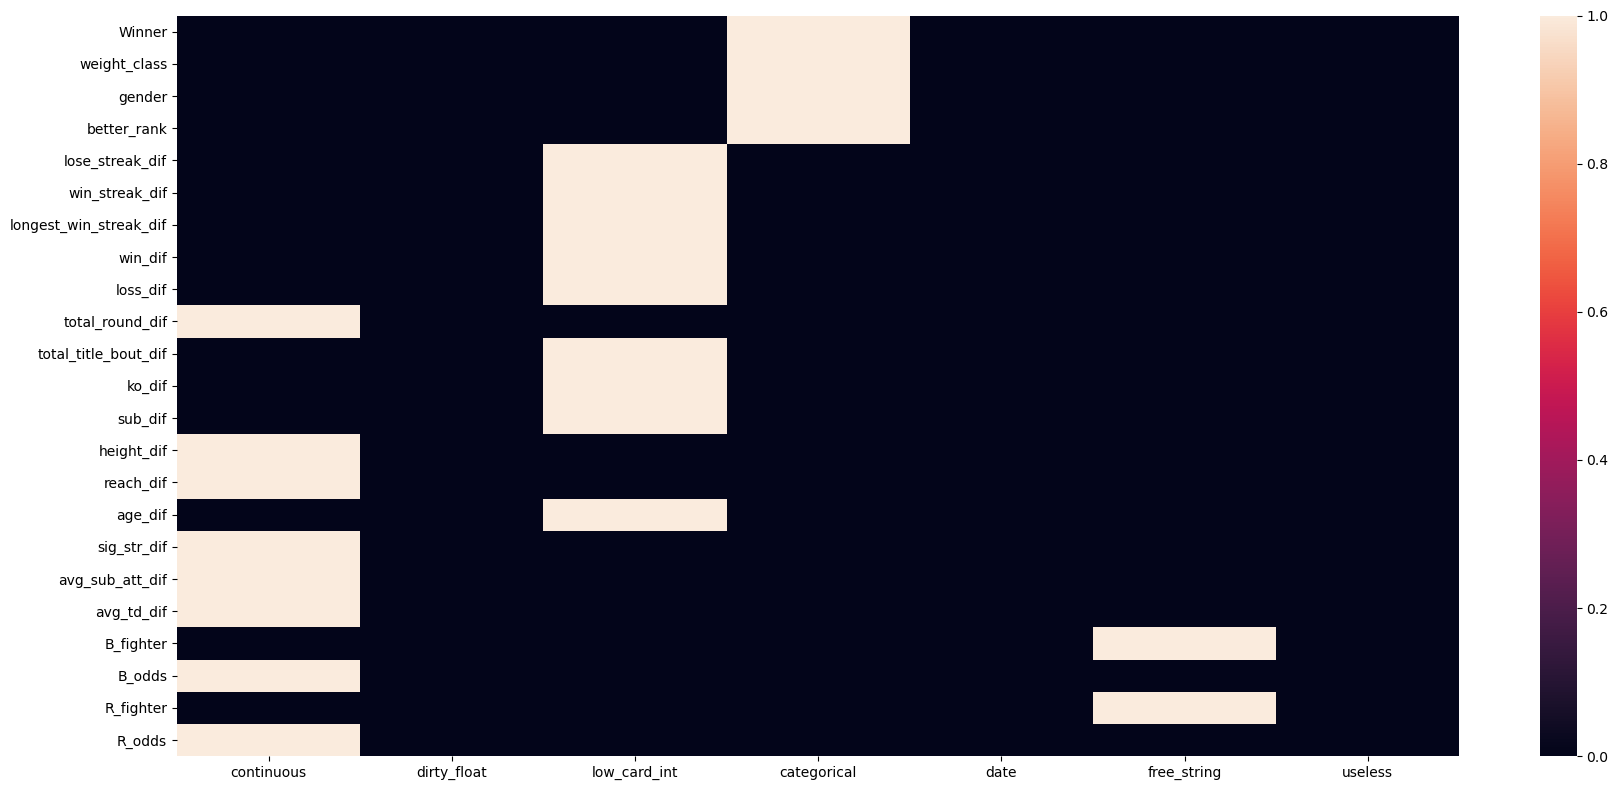

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))
sns.heatmap(types)
plt.tight_layout()
plt.show()

In [72]:
ufc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 0 to 4825
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Winner                  4826 non-null   category
 1   weight_class            4826 non-null   category
 2   gender                  4826 non-null   category
 3   better_rank             4826 non-null   category
 4   lose_streak_dif         4826 non-null   int64   
 5   win_streak_dif          4826 non-null   int64   
 6   longest_win_streak_dif  4826 non-null   int64   
 7   win_dif                 4826 non-null   int64   
 8   loss_dif                4826 non-null   int64   
 9   total_round_dif         4826 non-null   int64   
 10  total_title_bout_dif    4826 non-null   int64   
 11  ko_dif                  4826 non-null   int64   
 12  sub_dif                 4826 non-null   int64   
 13  height_dif              4826 non-null   float64 
 14  reach_dif               

Target looks like classification


C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 2 outliers in column B_odds.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 1 outliers in column R_odds.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column win_streak_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 8 outliers in column avg_td_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column reach_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: 

Linear Discriminant Analysis training set score: 0.626


C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


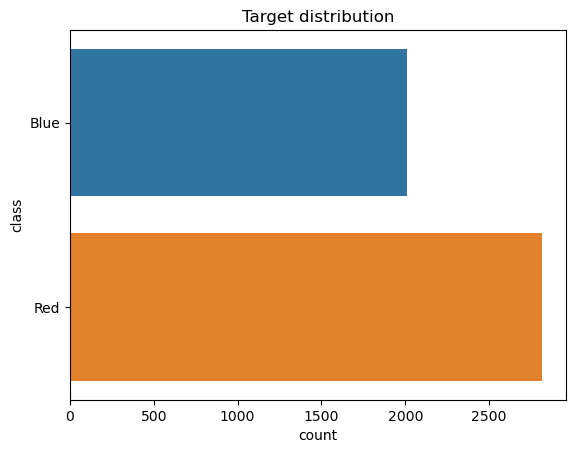

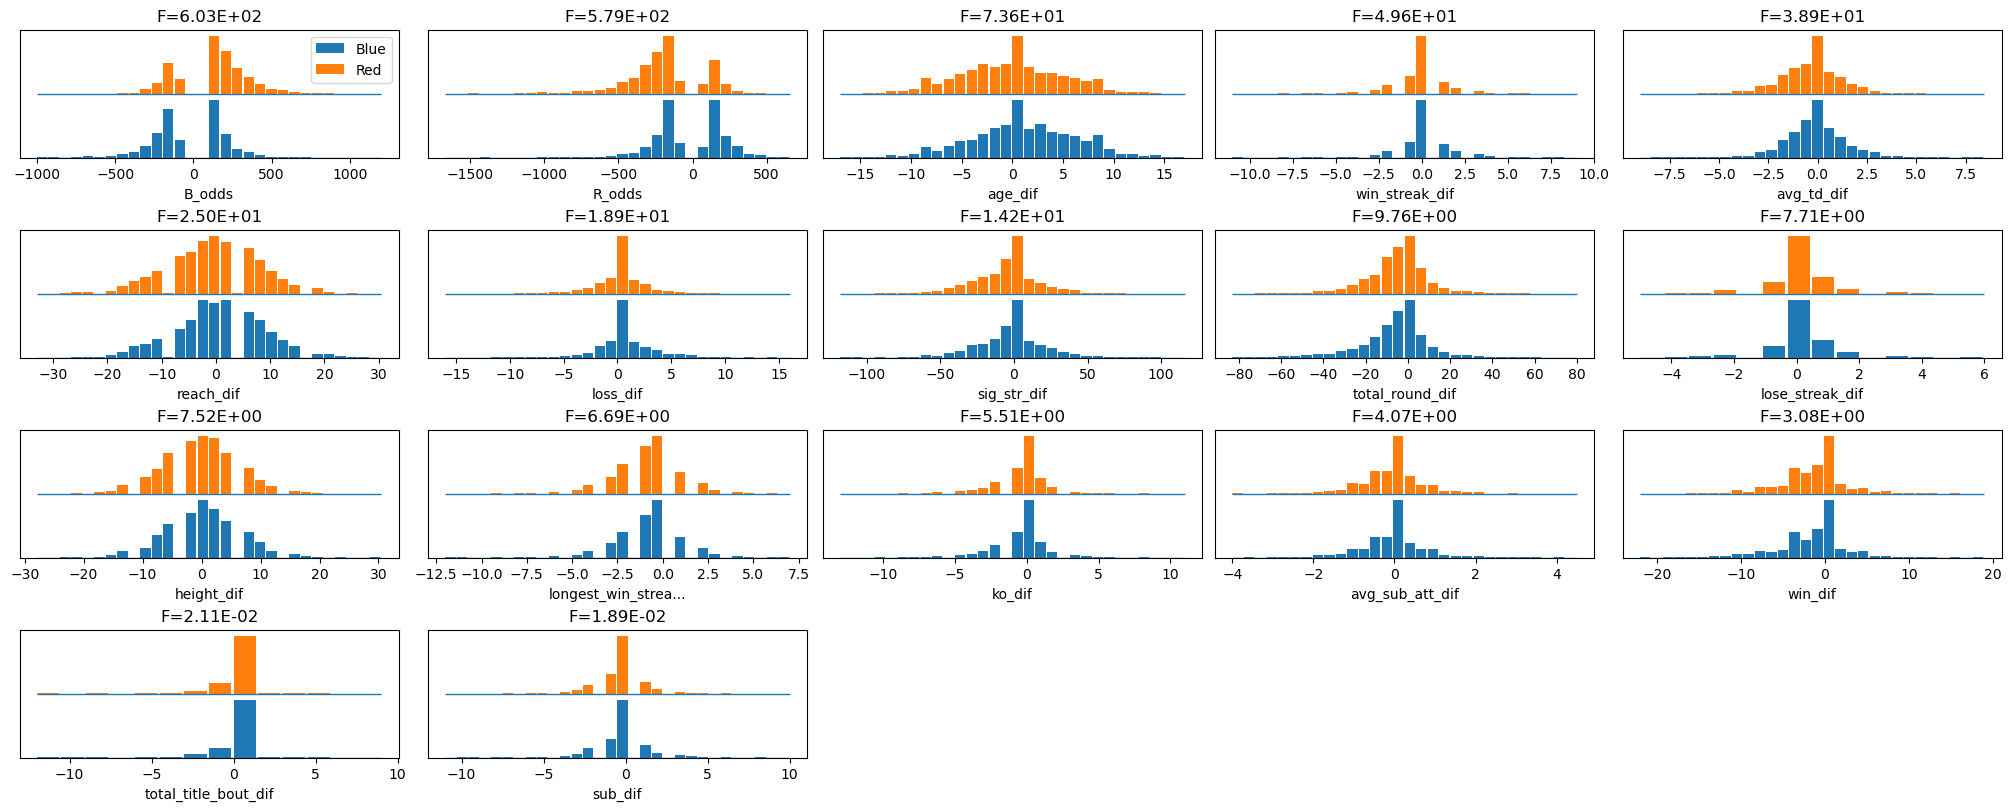

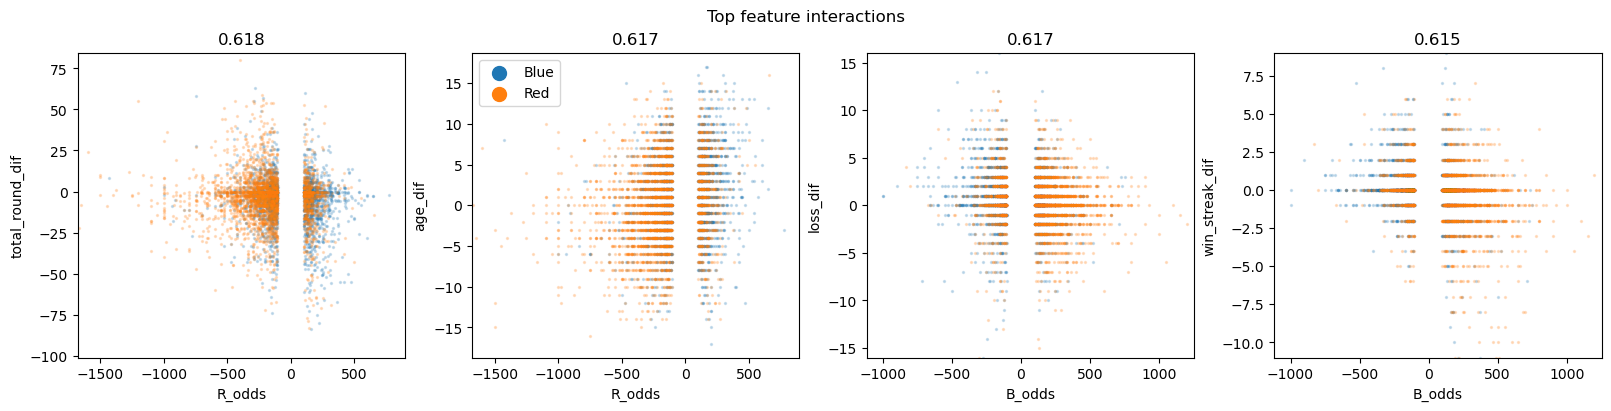

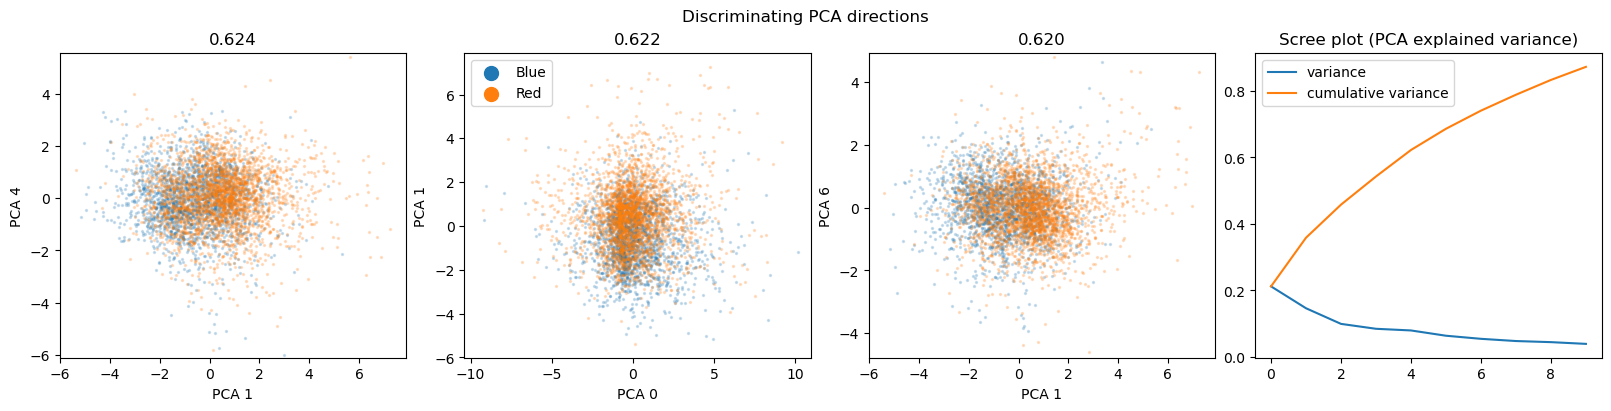

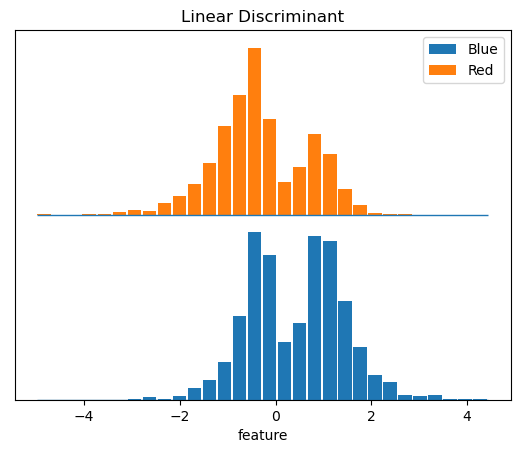

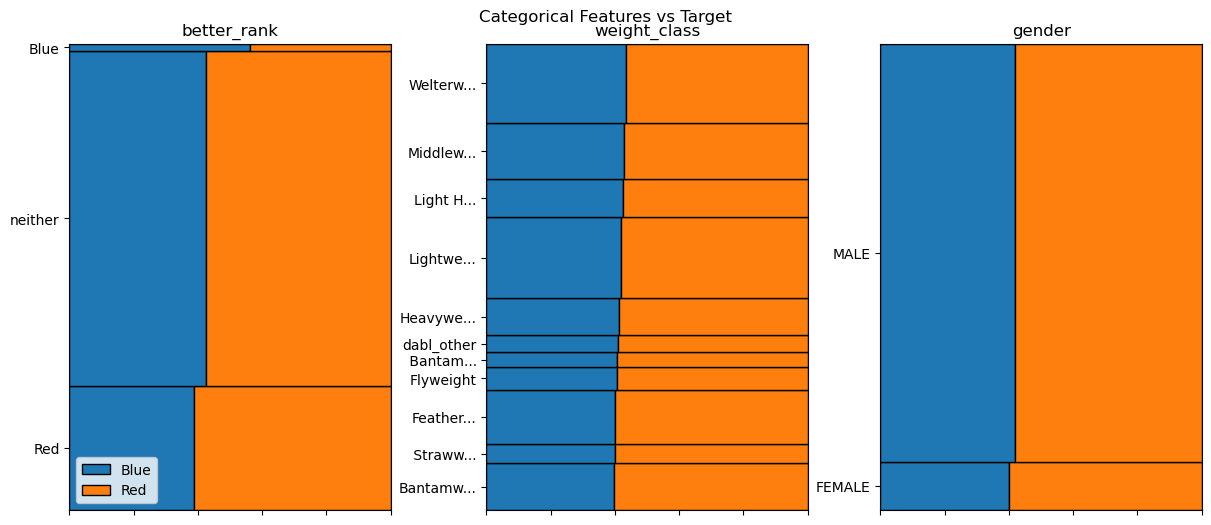

In [73]:
dabl.plot(ufc_clean, target_col='Winner')
plt.show()

In [74]:
ufc_clean.drop(['R_fighter', 'B_fighter'], inplace=True, axis=1)

In [75]:
cats = ufc_clean.select_dtypes('category').columns.values
ufc_clean[cats] = ufc_clean[cats].astype('object')

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from pickle import dump

In [77]:
X = ufc_clean.drop('Winner', axis=1)
print(f'X shape: {X.shape}')
y = ufc_clean.Winner.map({'Blue': 0, 'Red': 1})
print(f'y shape: {y.shape}\n')

num_features = ufc_clean.select_dtypes(np.number).columns.values
cat_features = ufc_clean.select_dtypes('object').drop('Winner', axis=1).columns.values
print(f'Numerical features: \n{num_features}\n')
print(f'Categorical features: \n{cat_features}\n')

num_transformer = make_pipeline(StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False))

preprocessor = make_column_transformer((num_transformer, num_features),
                                       (cat_transformer, cat_features))

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
dump(preprocessor, open('../models/processors/preprocessor_1.pkl', 'wb'))
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}\n')

input_shape = [X_train.shape[1]]
print(f'Input shape: {input_shape}')

X shape: (4826, 20)
y shape: (4826,)

Numerical features: 
['lose_streak_dif' 'win_streak_dif' 'longest_win_streak_dif' 'win_dif'
 'loss_dif' 'total_round_dif' 'total_title_bout_dif' 'ko_dif' 'sub_dif'
 'height_dif' 'reach_dif' 'age_dif' 'sig_str_dif' 'avg_sub_att_dif'
 'avg_td_dif' 'B_odds' 'R_odds']

Categorical features: 
['weight_class' 'gender' 'better_rank']

X_train shape: (3860, 35)
X_test shape: (966, 35)

Input shape: [35]


In [117]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model():
    model = keras.Sequential([
        layers.BatchNormalization(input_shape=input_shape),
        layers.Dense(150, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.27),
        layers.Dense(150, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.27),
        layers.Dense(150, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.27),
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

model = create_model()

In [118]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

Epoch 1/200
8/8 [==============================] - 1s 32ms/step - loss: 0.8504 - binary_accuracy: 0.5464 - val_loss: 0.6594 - val_binary_accuracy: 0.6553

Epoch 00001: saving model to ../models/tf_cp/training_1\cp.ckpt
Epoch 2/200
8/8 [==============================] - 0s 11ms/step - loss: 0.7819 - binary_accuracy: 0.5956 - val_loss: 0.6533 - val_binary_accuracy: 0.6077

Epoch 00002: saving model to ../models/tf_cp/training_1\cp.ckpt
Epoch 3/200
8/8 [==============================] - 0s 11ms/step - loss: 0.7330 - binary_accuracy: 0.6096 - val_loss: 0.6590 - val_binary_accuracy: 0.5766

Epoch 00003: saving model to ../models/tf_cp/training_1\cp.ckpt
Epoch 4/200
8/8 [==============================] - 0s 11ms/step - loss: 0.7246 - binary_accuracy: 0.5990 - val_loss: 0.6615 - val_binary_accuracy: 0.5714

Epoch 00004: saving model to ../models/tf_cp/training_1\cp.ckpt
Epoch 5/200
8/8 [==============================] - 0s 12ms/step - loss: 0.6968 - binary_accuracy: 0.6241 - val_loss: 0.6597 

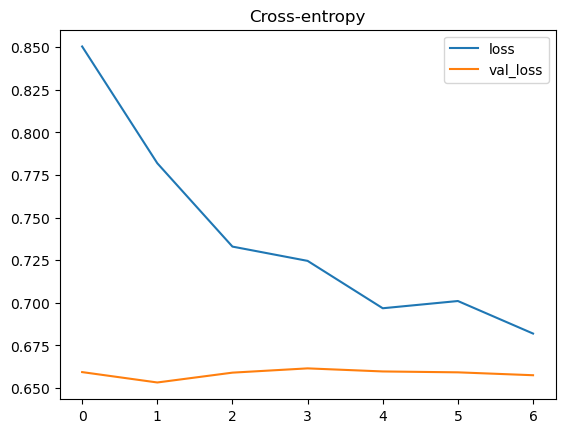

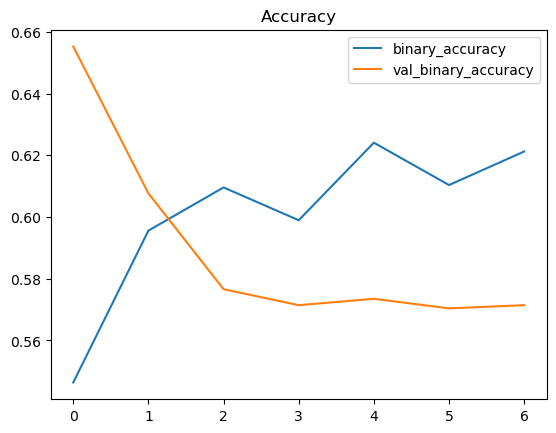

In [119]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

cp_callback = keras.callbacks.ModelCheckpoint(
    filepath='../models/tf_cp/training_1/cp.ckpt',
    save_weights_only=True,
    verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=500,
    epochs=200,
    callbacks=[early_stopping, cp_callback]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

plt.show()

In [121]:
model.save('../models/tf_models/model_1')

INFO:tensorflow:Assets written to: ../models/tf_models/model_1\assets


-----
# Round 2

In [143]:
ufc.head()

,location,country,Winner,title_bout,weight_class,gender,empty_arena,better_rank,lose_streak_dif,win_streak_dif,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_fighter,B_odds,R_fighter,R_odds
0,"Houston, Texas, USA",USA,Blue,True,Heavyweight,MALE,0,Red,0,2,...,2.54,5.08,-5,2.88,0.3,0.22,Ciryl Gane,-320,Derrick Lewis,250
1,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,0,Red,0,0,...,-2.54,-12.70,0,1.92,0.6,0.07,Pedro Munhoz,-115,Jose Aldo,-105
2,"Houston, Texas, USA",USA,Blue,False,Welterweight,MALE,0,Red,0,-1,...,-5.08,0.00,-4,3.78,-0.1,-2.98,Vicente Luque,-105,Michael Chiesa,-115
3,"Houston, Texas, USA",USA,Red,False,Strawweight,FEMALE,0,Red,0,-1,...,5.08,10.16,5,1.00,0.0,-0.17,Angela Hill,140,Tecia Torres,-160
4,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,0,neither,0,0,...,-2.54,2.54,7,-0.06,0.1,0.60,Casey Kenney,-125,Song Yadong,105


In [144]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 0 to 4825
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                4826 non-null   object 
 1   country                 4826 non-null   object 
 2   Winner                  4826 non-null   object 
 3   title_bout              4826 non-null   bool   
 4   weight_class            4826 non-null   object 
 5   gender                  4826 non-null   object 
 6   empty_arena             4826 non-null   int64  
 7   better_rank             4826 non-null   object 
 8   lose_streak_dif         4826 non-null   int64  
 9   win_streak_dif          4826 non-null   int64  
 10  longest_win_streak_dif  4826 non-null   int64  
 11  win_dif                 4826 non-null   int64  
 12  loss_dif                4826 non-null   int64  
 13  total_round_dif         4826 non-null   int64  
 14  total_title_bout_dif    4826 non-null   

In [145]:
X = ufc.copy()
y = X.pop('Winner')
X['title_bout'] = X['title_bout'].apply(lambda x: int(x))
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [146]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [147]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

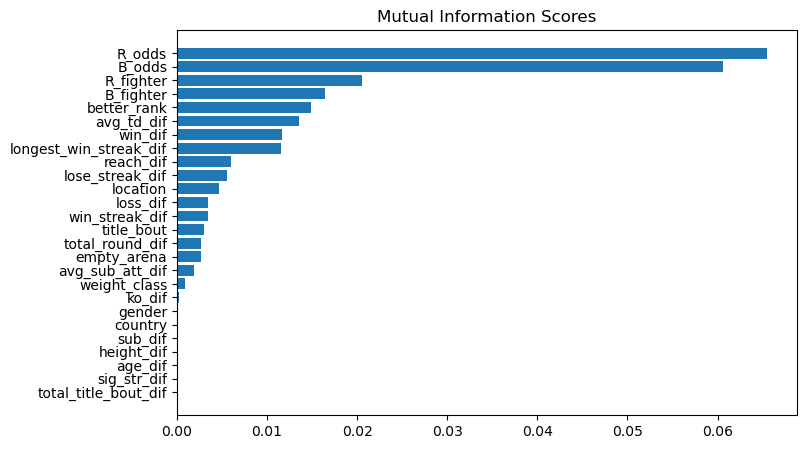

In [148]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
plt.show()

In [149]:
X.drop(['R_fighter', 'B_fighter', 'location', 'country'], inplace=True, axis=1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

In [151]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3860, 22)
(3860,)
(966, 22)
(966,)


In [152]:
def scale_data(X_train, X_test):
    train_cols, test_cols = X_train.columns, X_test.columns
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train, X_test = pd.DataFrame(X_train, columns=train_cols), pd.DataFrame(X_test, columns=test_cols)
    return X_train, X_test

X_train, X_test = scale_data(X_train, X_test)

In [153]:
fight_conds = ['title_bout', 'empty_arena']
odds = ['B_odds', 'R_odds']
striking = ['ko_dif', 'reach_dif', 'sig_str_dif']
grappling = ['sub_dif', 'avg_sub_att_dif', 'avg_td_dif']
fighter = ['weight_class', 'gender', 'better_rank', 'age_dif', 'height_dif', 'total_round_dif', 'total_title_bout_dif']
streaks = ['lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif']

In [155]:
X1 = X_train[fight_conds].copy()
X2 = X_train[odds].copy()
X3 = X_train[striking].copy()
X4 = X_train[grappling].copy()
X5 = X_train[fighter].copy()
X6 = X_train[streaks].copy()

In [156]:
from sklearn.cluster import KMeans

In [157]:
def clusters(X):
    k_list = range(1, 11)
    distances = []
    for k in k_list:
        kmeans = KMeans(n_clusters=k, random_state=1, max_iter=100)
        X[f'cluster_k{k}'] = kmeans.fit_predict(X)
        models.append(kmeans)
        distances.append(kmeans.inertia_)
    plt.figure(figsize=[10,4])
    plt.plot(k_list, distances, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title(f'The Elbow Method using Inertia')
    plt.show()
    return X

C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1077: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possi

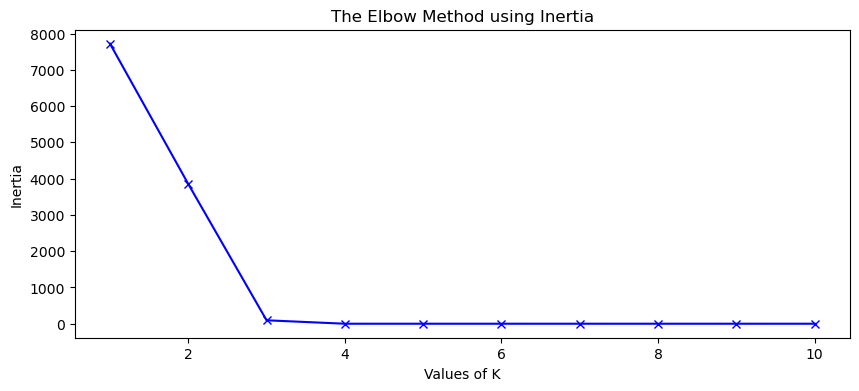

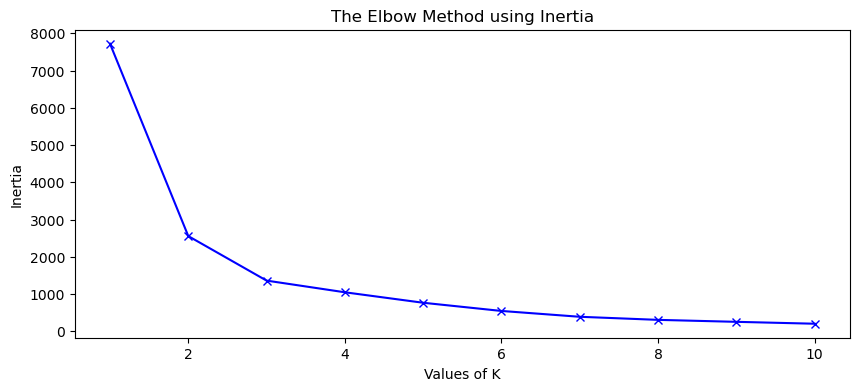

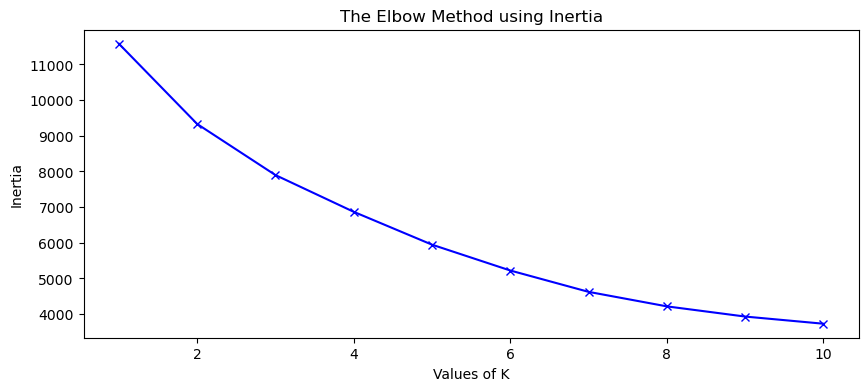

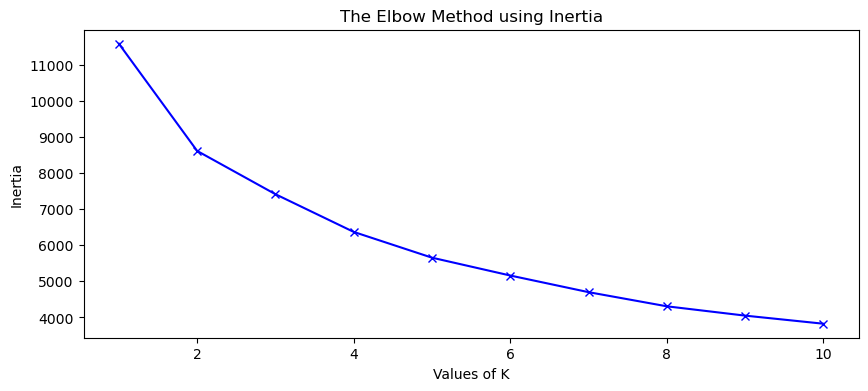

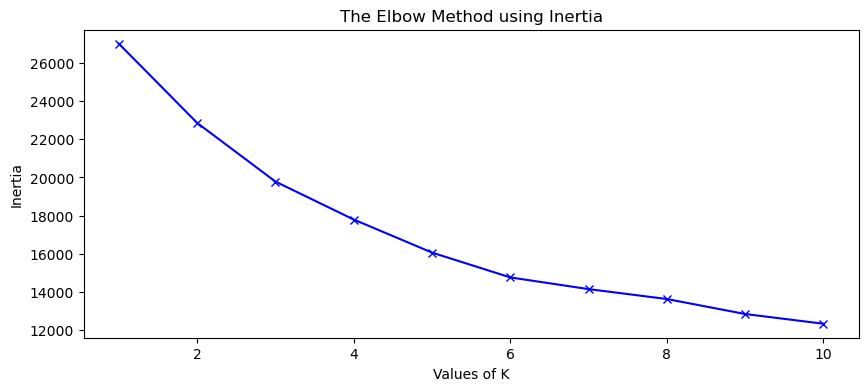

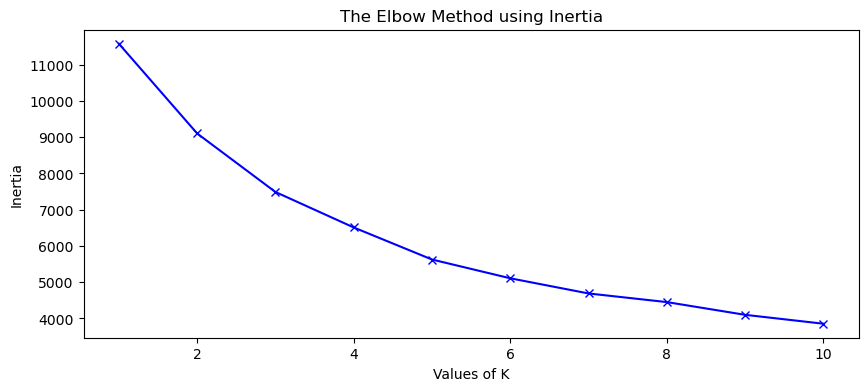

In [158]:
Xs = []
Xcols = []
for X in [X1, X2, X3, X4, X5, X6]:
    Xcols.append(X.columns)
    Xs.append(clusters(X))

In [159]:
def make_Xy(X, cluster_col, feature_set):
    Xy = X[feature_set + [cluster_col]].copy()
    Xy['winner'] = y_train.values
    Xy = Xy.groupby([cluster_col, 'winner']).count().reset_index()
    
    return Xy

Xy1 = make_Xy(X1, 'cluster_k3', fight_conds)

def cluster_props(Xy, cluster_col, ref_col):
    k_dfs = []
    for k in Xy[cluster_col].unique():
        df = Xy[Xy[cluster_col] == k]
        total_df = sum(df[ref_col])
        df['cluster_prop'] = df[ref_col] / total_df
        k_dfs.append(df)
    
    return pd.concat(k_dfs)

cluster_props(Xy1, 'cluster_k3', 'title_bout')
# Xy1['prop'] = Xy1['winner'].apply(lambda x: 0.58 if x == 'Red' else 0.42)
# Xy1.head()

<ipython-input-159-350869285f76>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_prop'] = df[ref_col] / total_df


,cluster_k3,winner,title_bout,empty_arena,cluster_prop
0,0,Blue,196,196,0.413502
1,0,Red,278,278,0.586498
2,1,Blue,1347,1347,0.421860
3,1,Red,1846,1846,0.578140
4,2,Blue,63,63,0.326425
5,2,Red,130,130,0.673575


In [160]:
Xys = []
cluster_cols = ['cluster_k3', 'cluster_k5', 'cluster_k8', 'cluster_k6', 'cluster_k7', 'cluster_k8']
feature_sets = [fight_conds, odds, striking, grappling, fighter, streaks]
for X, k_col, feats in zip(Xs, cluster_cols, feature_sets):
    Xys.append(make_Xy(X, k_col, feats))

In [161]:
ref_cols = [Xy.columns[-1] for Xy in Xys]
cluster_prop_list = []
for Xy, k_col, ref_col in zip(Xys, cluster_cols, ref_cols):
    cluster_prop_list.append(cluster_props(Xy, k_col, ref_col))

<ipython-input-159-350869285f76>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_prop'] = df[ref_col] / total_df


In [128]:
cluster_prop_list

[   cluster_k3 winner  title_bout  empty_arena  cluster_prop
 0           0   Blue         196          196      0.413502
 1           0    Red         278          278      0.586498
 2           1   Blue        1347         1347      0.421860
 3           1    Red        1846         1846      0.578140
 4           2   Blue          63           63      0.326425
 5           2    Red         130          130      0.673575,
    cluster_k5 winner  B_odds  R_odds  cluster_prop
 0           0   Blue     563     563      0.567540
 1           0    Red     429     429      0.432460
 2           1   Blue     147     147      0.465190
 3           1    Red     169     169      0.534810
 4           2   Blue     504     504      0.390698
 5           2    Red     786     786      0.609302
 6           3   Blue      44      44      0.144737
 7           3    Red     260     260      0.855263
 8           4   Blue     348     348      0.363257
 9           4    Red     610     610      0.636743,

In [162]:
clusters = [int(k.split('k')[1]) for k in cluster_cols]

In [163]:
clusters

[3, 5, 8, 6, 7, 8]

In [164]:
Xk = []
for X, cols, k_col in zip([X1, X2, X3, X4, X5, X6], Xcols, cluster_cols):
    df = X[cols]
    df[f'cluster_{cols}'] = X[k_col].copy()
    Xk.append(df)

<ipython-input-164-03c5d658a876>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'cluster_{cols}'] = X[k_col].copy()


In [165]:
for df in Xk:
    X_train = X_train.join(df[df.columns[-1]])

In [166]:
Xcols[0]

Index(['title_bout', 'empty_arena'], dtype='object')

In [167]:
models = []
for X, k, col in zip([X1, X2, X3, X4, X5, X6], clusters, Xcols):
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=100)
    kmeans.fit(X[col])
    models.append(kmeans)

In [174]:
X1 = X_test[fight_conds].copy()
X2 = X_test[odds].copy()
X3 = X_test[striking].copy()
X4 = X_test[grappling].copy()
X5 = X_test[fighter].copy()
X6 = X_test[streaks].copy()

In [175]:
cluster_cols = X_train.columns[-6:]

In [176]:
Xk_test = []
for X, model, col in zip([X1, X2, X3, X4, X5, X6], models, cluster_cols):
    X[col] = model.predict(X)
    Xk_test.append(X)

In [178]:
for df in Xk_test:
    X_test = X_test.join(df[df.columns[-1]])

In [182]:
from sklearn.preprocessing import OneHotEncoder

def oh_enc(X_train, X_test, cluster_cols):
    oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    encs = oh_encoder.fit_transform(X_train[cluster_cols])
    encs_test = oh_encoder.transform(X_test[cluster_cols])
    
    X_train.drop(cluster_cols, axis=1, inplace=True)
    X_test.drop(cluster_cols, axis=1, inplace=True)
    
    oh_clusters = pd.DataFrame(encs)
    oh_clusters_test = pd.DataFrame(encs_test)
    
    X_train = pd.concat([X_train, oh_clusters], axis=1)
    X_test = pd.concat([X_test, oh_clusters_test], axis=1)
    
    return X_train, X_test

X_train, X_test = oh_enc(X_train, X_test, cluster_cols)

In [194]:
y_train = y_train.map({'Blue': 0, 'Red': 1})
y_test = y_test.map({'Blue': 0, 'Red': 1})

In [238]:
model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.35),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.35),
    layers.Dense(100, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.35),
    layers.Dense(1, activation='sigmoid')
])

In [239]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

Epoch 1/200
8/8 [==============================] - 2s 35ms/step - loss: 0.8950 - binary_accuracy: 0.5174 - val_loss: 0.6823 - val_binary_accuracy: 0.5745
Epoch 2/200
8/8 [==============================] - 0s 13ms/step - loss: 0.8052 - binary_accuracy: 0.5640 - val_loss: 0.6682 - val_binary_accuracy: 0.6118
Epoch 3/200
8/8 [==============================] - 0s 13ms/step - loss: 0.7660 - binary_accuracy: 0.5858 - val_loss: 0.6632 - val_binary_accuracy: 0.6035
Epoch 4/200
8/8 [==============================] - 0s 13ms/step - loss: 0.7296 - binary_accuracy: 0.5972 - val_loss: 0.6604 - val_binary_accuracy: 0.6014
Epoch 5/200
8/8 [==============================] - 0s 13ms/step - loss: 0.7267 - binary_accuracy: 0.5956 - val_loss: 0.6590 - val_binary_accuracy: 0.6004
Epoch 6/200
8/8 [==============================] - 0s 13ms/step - loss: 0.7245 - binary_accuracy: 0.5935 - val_loss: 0.6567 - val_binary_accuracy: 0.6056
Epoch 7/200
8/8 [==============================] - 0s 13ms/step - loss: 0.71

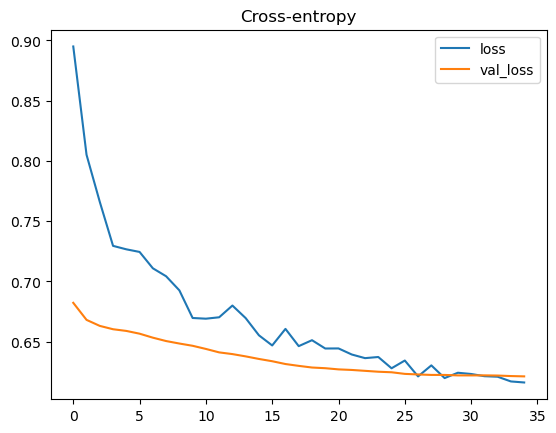

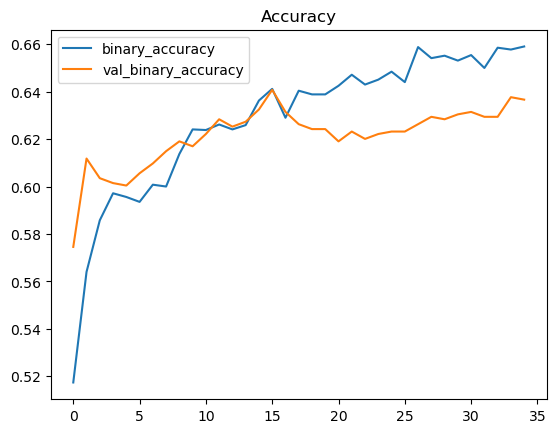

In [240]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=500,
    epochs=200,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

plt.show()

In [241]:
X_train

,title_bout,weight_class,gender,empty_arena,better_rank,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,...,27,28,29,30,31,32,33,34,35,36
0,-0.229416,1.092529,-0.340958,-0.379083,0.535274,-0.111627,0.091802,1.357771,1.096010,-0.147536,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.229416,-1.168684,-0.340958,-0.379083,0.535274,-0.111627,0.091802,0.373731,0.351754,-0.147536,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.229416,0.446468,-0.340958,-0.379083,-1.599188,-0.111627,0.091802,0.373731,0.599840,-0.495848,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.229416,1.092529,-0.340958,-0.379083,0.535274,-2.125093,-1.071932,-0.118289,-0.144417,-0.844159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.229416,0.769499,2.932915,-0.379083,0.535274,-0.111627,0.091802,0.373731,0.103669,-0.495848,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,4.358899,-0.522623,2.932915,-0.379083,-1.599188,-0.111627,-1.071932,-0.610309,-0.144417,-0.147536,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3856,-0.229416,1.415560,-0.340958,-0.379083,0.535274,-0.111627,-0.490065,-0.118289,0.351754,-0.495848,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3857,-0.229416,-1.491714,-0.340958,-0.379083,-1.599188,-1.118360,-1.071932,2.833832,2.336437,-1.192470,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3858,-0.229416,-1.491714,-0.340958,-0.379083,0.535274,-0.111627,0.091802,-1.102329,-1.136758,0.897398,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
train = X_train.copy()
train['Winner'] = y_train.values
train.to_csv('../data/interim/train_cluster.csv', index=False)

test = X_test.copy()
test['Winner'] = y_test.values
test.to_csv('../data/interim/test_cluster.csv', index=False)